<a href="https://colab.research.google.com/github/gilbertossoares/Analises/blob/main/TrafegoVeiculosVIXVV/TrafegoRodosol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de tráfego 2020

Uma análise de tráfego de carros na Grande Vitória (GV) no ano de 2020, entender o quanto a pandemia modificou o comportamento.


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

# Fonte de dados
Os dados ultilizados nesta análise são disponibilizados pelo Governo do Estado do Espírito Santo através da URL https://transparencia.es.gov.br/. Os dados são disponibilizados por ano por intermédio da ARSP – Agência de Regulação de Serviços Públicos do Espírito Santo.
 

In [11]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving fluxoveiculosrodosol-2019.csv to fluxoveiculosrodosol-2019 (1).csv
Saving fluxoveiculosrodosol-2020.csv to fluxoveiculosrodosol-2020 (1).csv
User uploaded file "fluxoveiculosrodosol-2019.csv" with length 66563 bytes
User uploaded file "fluxoveiculosrodosol-2020.csv" with length 66563 bytes


In [12]:
dados2020 = 'fluxoveiculosrodosol-2020.csv'
dados2019 = 'fluxoveiculosrodosol-2019.csv'

In [13]:
df2020 = pd.read_csv(dados2020, sep=';')
df2019 = pd.read_csv(dados2019, sep=';')

In [14]:
df2020.head()

,data,praca,categoria_1,categoria_2,categoria_3,categoria_4,categoria_5,categoria_6,categoria_7,categoria_8,categoria_88,categoria_9,veiculosDia,valorDia,Id
0,01/01/2020 00:00:00,PRAIA DO SOL,21794,185,55,73,2,37,10,8,274,1072,23510,"208876,5000",32940
1,02/01/2020 00:00:00,PRAIA DO SOL,21630,437,82,130,6,59,19,21,328,1002,23714,"215145,0000",32941
2,03/01/2020 00:00:00,PRAIA DO SOL,19721,504,69,173,7,65,27,27,347,685,21625,"199651,5000",32942
3,04/01/2020 00:00:00,PRAIA DO SOL,18643,310,65,153,12,41,11,19,254,616,20124,"183694,5000",32943
4,05/01/2020 00:00:00,PRAIA DO SOL,21360,212,86,110,8,35,8,13,246,802,22880,"205690,5000",32944


In [17]:
df2019.head()

,data,praca,categoria_1,categoria_2,categoria_3,categoria_4,categoria_5,categoria_6,categoria_7,categoria_8,categoria_88,categoria_9,veiculosDia,valorDia,Id
0,01/01/2019 00:00:00,PRAIA DO SOL,22494,203,84,83,4,26,2,0,349,969,24214,"214933,5000",31783.0
1,02/01/2019 00:00:00,PRAIA DO SOL,19908,389,79,153,6,37,10,17,400,910,21909,"198274,5000",31784.0
2,03/01/2019 00:00:00,PRAIA DO SOL,16770,429,78,153,2,33,8,19,416,917,18825,"170572,5000",31785.0
3,04/01/2019 00:00:00,PRAIA DO SOL,20235,444,80,158,2,52,9,20,482,944,22426,"203094,0000",31786.0
4,05/01/2019 00:00:00,PRAIA DO SOL,21882,313,122,99,6,28,2,2,334,1029,23817,"212863,5000",31787.0


In [15]:
df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   data          730 non-null    object
 1   praca         730 non-null    object
 2   categoria_1   730 non-null    int64 
 3   categoria_2   730 non-null    int64 
 4   categoria_3   730 non-null    int64 
 5   categoria_4   730 non-null    int64 
 6   categoria_5   730 non-null    int64 
 7   categoria_6   730 non-null    int64 
 8   categoria_7   730 non-null    int64 
 9   categoria_8   730 non-null    int64 
 10  categoria_88  730 non-null    int64 
 11  categoria_9   730 non-null    int64 
 12  veiculosDia   730 non-null    int64 
 13  valorDia      730 non-null    object
 14  Id            730 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 85.7+ KB


In [18]:
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   data          722 non-null    object 
 1   praca         722 non-null    object 
 2   categoria_1   722 non-null    int64  
 3   categoria_2   722 non-null    int64  
 4   categoria_3   722 non-null    int64  
 5   categoria_4   722 non-null    int64  
 6   categoria_5   722 non-null    int64  
 7   categoria_6   722 non-null    int64  
 8   categoria_7   722 non-null    int64  
 9   categoria_8   722 non-null    int64  
 10  categoria_88  722 non-null    int64  
 11  categoria_9   722 non-null    int64  
 12  veiculosDia   722 non-null    int64  
 13  valorDia      721 non-null    object 
 14  Id            721 non-null    float64
dtypes: float64(1), int64(11), object(3)
memory usage: 84.7+ KB


In [16]:
df2020.describe()

,categoria_1,categoria_2,categoria_3,categoria_4,categoria_5,categoria_6,categoria_7,categoria_8,categoria_88,categoria_9,veiculosDia,Id
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,19021.675342,238.442466,44.987671,50.086301,4.812329,25.242466,10.749315,14.471233,455.324658,2332.386301,22198.178082,33566.449315
std,12030.265894,124.135463,18.908084,52.421652,2.814642,27.233837,13.140536,17.640204,294.752976,1932.311725,14001.806747,369.612433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32940.000000
25%,8550.250000,147.000000,33.000000,6.000000,3.000000,2.000000,0.000000,0.000000,255.000000,721.500000,10207.250000,33214.250000
50%,14591.500000,228.000000,44.000000,19.000000,5.000000,9.500000,1.000000,2.000000,355.000000,1117.500000,16618.500000,33611.500000
75%,29804.750000,329.750000,55.000000,90.750000,6.000000,49.000000,23.000000,31.000000,749.750000,4356.250000,34565.750000,33915.750000
max,43949.000000,665.000000,205.000000,246.000000,17.000000,137.000000,63.000000,60.000000,1043.000000,6619.000000,51969.000000,34157.000000


In [20]:
df2019.describe()

,categoria_1,categoria_2,categoria_3,categoria_4,categoria_5,categoria_6,categoria_7,categoria_8,categoria_88,categoria_9,veiculosDia,Id
count,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,721.000000
mean,24365.128809,299.808864,47.759003,69.297784,4.649584,23.242382,8.433518,12.436288,558.530471,2753.261773,28142.548476,32368.653259
std,14637.233674,134.220840,18.855391,62.890312,2.770046,25.092964,11.251957,15.404737,297.179431,2346.980371,17004.683077,358.927053
min,4866.000000,64.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,121.000000,225.000000,5760.000000,31783.000000
25%,9883.750000,219.000000,35.250000,11.000000,3.000000,2.000000,0.000000,0.000000,349.250000,779.000000,11403.500000,32207.000000
50%,20894.000000,262.000000,44.000000,57.500000,4.000000,11.500000,1.000000,1.000000,414.000000,1113.500000,23063.500000,32387.000000
75%,41000.500000,428.750000,56.000000,131.000000,6.000000,47.000000,18.000000,27.000000,936.750000,5569.500000,47808.250000,32567.000000
max,46222.000000,1126.000000,222.000000,398.000000,18.000000,176.000000,110.000000,99.000000,1213.000000,6671.000000,54116.000000,33051.000000


As categorias de veiculos é a seguinte conforme consultado no site da Rodosol:


Categoria	Tipo de veículo	Eixos	Rodagem	Tarifa unidirecional
sentido Vila Velha X Vitória.

| Categoria |                                 Tipo                                 | Nº de eixos |
|:---------:|:--------------------------------------------------------------------:|:-----------:|
| 01        |                    Automóvel, Caminhonete e Furgão                   |      2      |
| 02        |            Caminhão Leve, Ônibus, Caminhão-Trator e Furgão           |      2      |
| 03        |       Automóvel com Semi-Reboque e Caminhonete com Semi-Reboque      |      3      |
| 04        | Caminhão, Caminhão-Trator, Caminhão-Trator com Semi-Reboque e Ônibus |      3      |
| 05        |            Automóvel com Reboque e Caminhonete com Reboque           |      4      |
| 06        |        Caminhão com Reboque e Caminhão-Trator com Semi-Reboque       |      4      |
| 07        |        Caminhão com Reboque e Caminhão-Trator com Semi-Reboque       |      5      |
| 08        |        Caminhão com Reboque e Caminhão-Trator com Semi-Reboque       |      6      |
| 09        |              Motocicleta, Motonetas e Bicicletas a Motor             |      2      |

In [21]:
df2020.data = pd.to_datetime(df2020['data'],format='%d/%m/%Y %H:%M:%S')
df2019.data = pd.to_datetime(df2019['data'],format='%d/%m/%Y %H:%M:%S')

In [22]:
df2020['Mes'] = df2020['data'].dt.month
df2019['Mes'] = df2019['data'].dt.month

In [23]:
df2020['Ano'] = df2020['data'].dt.year
df2019['Ano'] = df2019['data'].dt.year

In [24]:
df2020.groupby(by=[df2020['praca'],df2020['Mes'],df2020['Ano']]).sum()

categoria_1  categoria_2  ...  veiculosDia       Id
praca          Mes Ano                             ...                      
PRAIA DO SOL   1   2020       488441        12615  ...       547523  1021605
               2   2020       360675        10867  ...       414636   956565
               3   2020       222794         9700  ...       269237  1027216
               4   2020       161010         6043  ...       196783   994995
               5   2020       188985         7110  ...       228646  1034842
               6   2020       207766         7556  ...       248738  1016145
               7   2020       247346         8652  ...       291912  1050962
               8   2020       272349         8763  ...       318551  1040546
               9   2020       318665         9288  ...       368753  1007895
               10  2020       320771         9838  ...       369278  1042437
               11  2020       302266         9311  ...       350412  1019805
               12  2020       332842         8777  ...       371814  1055674
TERCEIRA PONTE 1   2020      1132065         6482  ...      1299431  1025356
               2   2020      1053546         6052  ...      1215887   960074
               3   2020       854619         5537  ...      1009745  1030068
               4   2020       525720         4016  ...       644540   997755
               5   2020       636117         4459  ...       768174  1037694
               6   2020       702909         4709  ...       841384  1017975
               7   2020       835757         5523  ...       989035  1052853
               8   2020       904119         5535  ...      1057502  1044359
               9   2020       952425         5724  ...      1110047  1011585
               10  2020      1036304         6263  ...      1197625  1046250
               11  2020      1019848         6129  ...      1180446  1020705
               12  2020       808484         5114  ...       914571   990147

[24 rows x 12 columns]

In [25]:
df2019.groupby(by=[df2019['praca'],df2019['Mes'],df2019['Ano']]).sum()

categoria_1  categoria_2  ...  veiculosDia         Id
praca          Mes Ano                             ...                        
PRAIA DO SOL   1   2019       523497        12156  ...       585931   985738.0
               2   2019       293060        10213  ...       342044   891170.0
               3   2019       359829        10643  ...       412845   987567.0
               4   2019       299308        10940  ...       349816   966645.0
               5   2019       266822        10954  ...       317434   999812.0
               6   2019       276965        10240  ...       324832   968475.0
               7   2019       308960        11637  ...       359594  1001703.0
               8   2019       284415        12132  ...       333973  1006446.0
               9   2019       286323        11555  ...       337133   974895.0
               10  2019       315410        12838  ...       370901  1008337.0
               11  2019       308428        12642  ...       358618   986805.0
               12  2019       402036        13083  ...       460326  1020644.0
TERCEIRA PONTE 1   2019      1156912         6506  ...      1328746   988528.0
               2   2019      1102269         6066  ...      1270147   893690.0
               3   2019      1124340         6505  ...      1296366   990357.0
               4   2019      1133148         6592  ...      1309386   970305.0
               5   2019      1156628         6211  ...      1342822  1003594.0
               6   2019      1101450         5804  ...      1273385   972135.0
               7   2019      1196187         6519  ...      1382760  1005485.0
               8   2019      1226665         6505  ...      1412515  1009298.0
               9   2019      1174769         6319  ...      1354921   977655.0
               10  2019      1241056         7248  ...      1439797  1011189.0
               11  2019      1127150         6869  ...      1290241   990435.0
               12  2019       925996         6285  ...      1064387   726891.0

[24 rows x 12 columns]

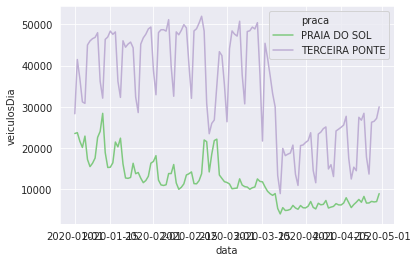

In [ ]:
serie=sns.lineplot(x='data', y='veiculosDia',hue='praca', data=df[df.Mes < 5])
serie=serie

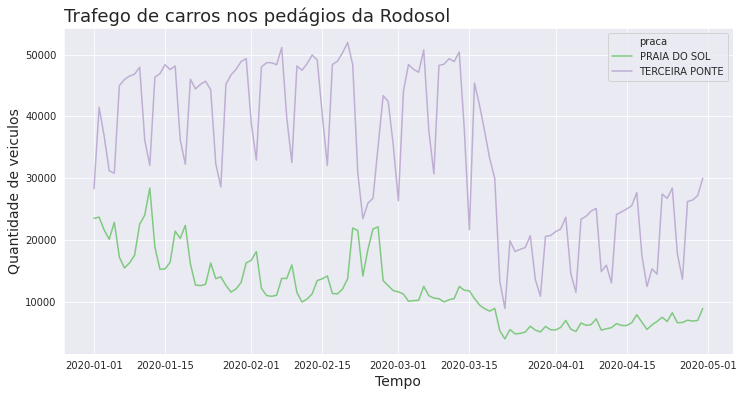

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
serie=sns.lineplot(x='data', y='veiculosDia', hue='praca', data=df[df.Mes < 5])
serie.figure.set_size_inches(12,6)
serie.set_title('Trafego de carros nos pedágios da Rodosol', loc='left',fontsize=18)
serie.set_xlabel('Tempo', fontsize=14)
serie.set_ylabel('Quantidade de veiculos',fontsize=14)
serie=serie

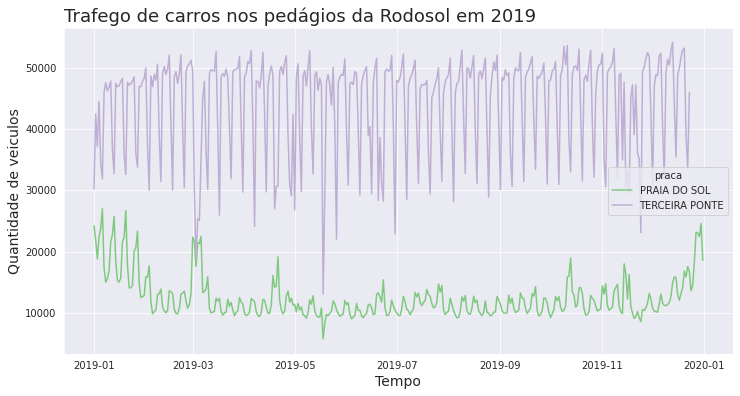

In [28]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
serie=sns.lineplot(x='data', y='veiculosDia', hue='praca', data=df2019)
serie.figure.set_size_inches(12,6)
serie.set_title('Trafego de carros nos pedágios da Rodosol em 2019', loc='left',fontsize=18)
serie.set_xlabel('Tempo', fontsize=14)
serie.set_ylabel('Quantidade de veiculos',fontsize=14)
serie=serie

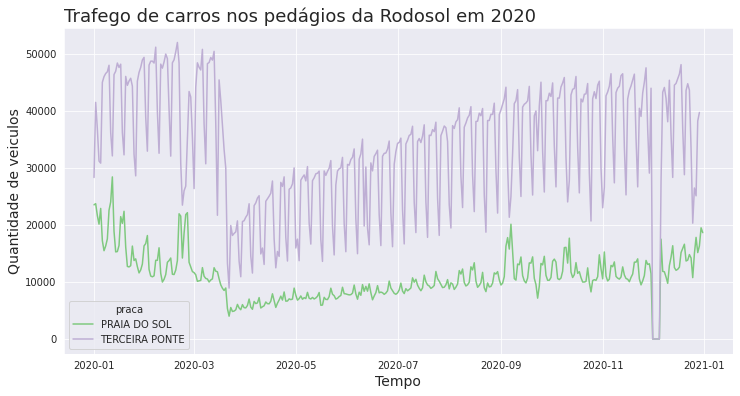

In [29]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
serie=sns.lineplot(x='data', y='veiculosDia', hue='praca', data=df2020)
serie.figure.set_size_inches(12,6)
serie.set_title('Trafego de carros nos pedágios da Rodosol em 2020', loc='left',fontsize=18)
serie.set_xlabel('Tempo', fontsize=14)
serie.set_ylabel('Quantidade de veiculos',fontsize=14)
serie=serie

In [39]:
df2020[df2020.categoria_1 == 0]

,data,praca,categoria_1,categoria_2,categoria_3,categoria_4,categoria_5,categoria_6,categoria_7,categoria_8,categoria_88,categoria_9,veiculosDia,valorDia,Id,Mes,Ano
670,2020-12-01,PRAIA DO SOL,0,0,0,0,0,0,0,0,0,0,0,"0,0000",34039,12,2020
671,2020-12-02,PRAIA DO SOL,0,0,0,0,0,0,0,0,0,0,0,"0,0000",34040,12,2020
672,2020-12-03,PRAIA DO SOL,0,0,0,0,0,0,0,0,0,0,0,"0,0000",34041,12,2020
673,2020-12-04,PRAIA DO SOL,0,0,0,0,0,0,0,0,0,0,0,"0,0000",34042,12,2020
674,2020-12-05,PRAIA DO SOL,0,0,0,0,0,0,0,0,0,0,0,"0,0000",34043,12,2020
701,2020-12-01,TERCEIRA PONTE,0,0,0,0,0,0,0,0,0,0,0,"0,0000",34129,12,2020
702,2020-12-02,TERCEIRA PONTE,0,0,0,0,0,0,0,0,0,0,0,"0,0000",34130,12,2020
703,2020-12-03,TERCEIRA PONTE,0,0,0,0,0,0,0,0,0,0,0,"0,0000",34131,12,2020
704,2020-12-04,TERCEIRA PONTE,0,0,0,0,0,0,0,0,0,0,0,"0,0000",34132,12,2020
705,2020-12-05,TERCEIRA PONTE,0,0,0,0,0,0,0,0,0,0,0,"0,0000",34133,12,2020


Não possui dados nos 5 primeiros dias de dezembro nas duas praças de pedágio, todas categorias apresentam como zeradas.

É perceptível com ajuda dos gráficos entender que após o início do isolamento social e as médidas restritivas o comportamento do trânsito principalmente na Terceira Ponte onde é possível ver o crescimento de fluxo ao longo dos meses.